# U.S. Medical Insurance Costs

In [1]:
import csv

In [41]:
ins_list = []
with open('insurance.csv') as insurance_file:
    insurance_obj = csv.DictReader(insurance_file)
    for row in insurance_obj:
        ins_list.append(row)
#print(ins_list)        

In [42]:
# Initialize empty lists for each key
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

# Iterate over the dictionaries in ins_list
for dictionary in ins_list:
    # Extract values for each key and append to respective lists
    age.append(dictionary['age'])
    sex.append(dictionary['sex'])
    bmi.append(dictionary['bmi'])
    children.append(dictionary['children'])
    smoker.append(dictionary['smoker'])
    region.append(dictionary['region'])
    charges.append(dictionary['charges'])

# Print the contents of each list
#print(age,sex,bmi,children,smoker,region,charges)


The linear regression equation for age vs. charges is y = 257.723 * x + 3165.885. The r^2 value, p value and standard error are 0.089, 0.000, 22.502.


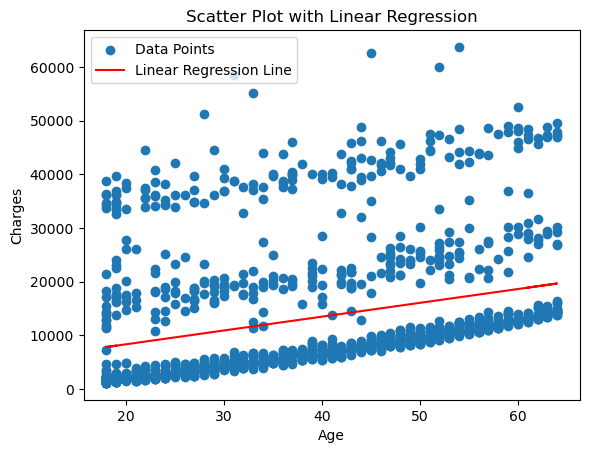

The linear regression correlation coefficient is low at 0.089, indicating that the model explains little 

of the variation in the data. The scatter plot of the data, the best fit line and the regression p value suggest that

age is a significant independent variable. In order to develop a model that explains more of the variation in the data

a muliple linear regression model will be developed using age, sex, bmi, children, smoker, and region as independent 

variables and charges as the dependent variable.


In [44]:
#scope of data analysis will be: 
#(1) linear regression and plot of age vs. premium 
#(2) multiple linear regression model of the data set
from scipy import stats
#(1) linear regression and plot of age vs. premium
    #clean up data to float
age = [float(a) for a in age]
charges = [float(a) for a in charges]
    #do linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(age,charges)
slope = format(slope, '.3f')
intercept = format(intercept, '.3f')
r_sq = format(float(r_value)**2, '.3f')
p_value = format(p_value, '.3f')
std_err = format(std_err, '.3f')
print('The linear regression equation for age vs. charges is y = '+str(slope)+" * x + "+str(intercept)+'. The r^2 value, p value and standard error are '+str(r_sq)+', '+str(p_value)+', '+str(std_err)+'.')
    #generate plot
import matplotlib.pyplot as plt
import numpy as np

# Perform linear regression
slope, intercept = np.polyfit(age, charges, 1)
regression_line = [slope * x + intercept for x in age]

# Generate scatter plot and linear regression line
plt.scatter(age, charges, label='Data Points')
plt.plot(age, regression_line, color='red', label='Linear Regression Line')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter Plot with Linear Regression')

# Show legend
plt.legend()

# Display the plot
plt.show()

#print analysis summary
print("""The linear regression correlation coefficient is low at 0.089, indicating that the model explains little \n
of the variation in the data. The scatter plot of the data, the best fit line and the regression p value suggest that\n
age is a significant independent variable. In order to develop a model that explains more of the variation in the data\n
a muliple linear regression model will be developed using age, sex, bmi, children, smoker, and region as independent \n
variables and charges as the dependent variable.""")

In [45]:
#(2) multiple linear regression model of the data set
import pandas as pd
import statsmodels.api as sm

#convert data to float
bmi = [float(a) for a in bmi]
children = [float(a) for a in children]

# Create a DataFrame from the given lists
data = pd.DataFrame({
    'age': age,
    'sex': sex,
    'bmi': bmi,
    'children': children,
    'smoker': smoker,
    'region': region,
    'charges': charges
})

# Convert nominal variables to dummy variables
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])

# Define the independent variables (features) and the dependent variable
X = data.drop('charges', axis=1)
y = data['charges']

# Add a constant column to the features
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())
print("""\n
The regression p value results suggest that sex and region are not significant variables. These two variables will\n
be removed and the regression analysis performed again.""")




                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:06:15   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -296.4168    430.507  

In [46]:
# Create a DataFrame from the given lists
data = pd.DataFrame({
    'age': age,
    'bmi': bmi,
    'children': children,
    'smoker': smoker,
    'charges': charges
})

# Convert nominal variables to dummy variables
data = pd.get_dummies(data, columns=['smoker'])

# Define the independent variables (features) and the dependent variable
X = data.drop('charges', axis=1)
y = data['charges']

# Add a constant column to the features
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())
print("""\n
This version of the model has an r^2 value of 0.749 which improved from 0.089 for the age vs. charges \n
regression analysis. The multiple linear regression model explains much more variation in the data.\n
Additionally, the p values for the independent variables show greater than 99% confidence that the \n
independent variables, age, bmi, children, and smoker, are statistically significant.\n
\n
The mulitple linear regression equation is y = (m1 * x1) + (m2 * x2) + (m3 * x3) + (m4 * x4) + (m5 * x5) + b \n
where: \n
y = charges \n
m1 = age coefficient = 257.8495 \n
m2 = bmi coefficient = 321.8514 \n
m3 = children coefficient = 473.5023 \n
m4 = smoker no coefficient = -1.197e+04 \n
m5 = smoker yes coefficient = 1.184e+04 \n
b = -131.3796 \n
This model can be used to predict the charges when the x values are plugged into it.""")

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:06:22   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -131.3796    629.912     -0.209      0.8